Number of times X subceeded the thresholds: 5096


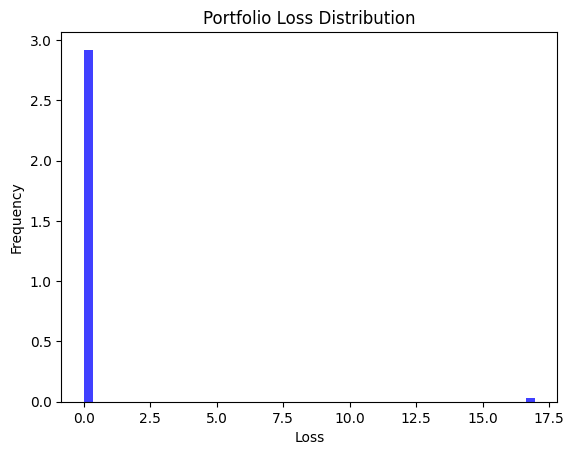

Expected Loss (EL): 5096.00
Unexpected Loss (UL): 0.00
Value-at-Risk (VaR 99%): 5096.00
Value-at-Risk (VaR 95%): 5096.00


In [90]:
import random
import numpy
import math
from scipy.stats import norm

# Initialize seed for reproducibility
random.seed(10)

# Parameters
rho = 0.2

# Number of simulations
num_simulations = 1000

# Placeholder for results
subceed = 0

# Generate PD list with random values
PD = [random.uniform(0, 0.7) for _ in range(100)]

for _ in range(num_simulations):
    # Generate new random values for each simulation
    Y = random.uniform(0, 1)
    Z = [random.uniform(0, 1) for _ in range(100)]
    
    # Compute X based on the formula
    X = [Y * math.sqrt(rho**2) + z * math.sqrt((1 - rho)**2) for z in Z]

    # Calculate the thresholds for each Z using PD
    thresholds = [norm.ppf(pd) for pd in PD]
    
    # Count how many times X subceeds the corresponding threshold
    for x, c in zip(X, thresholds):
        if x < c:
            subceed += 1

print(f'Number of times X subceeded the thresholds: {subceed}')

# Portfolio loss distribution
plt.hist(losses, bins=50, density=True, alpha=0.75, color='blue')
plt.title('Portfolio Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

# Expected Loss (EL)
EL = np.mean(losses)
print(f"Expected Loss (EL): {EL:.2f}")

# Unexpected Loss (UL) - Standard Deviation of Losses
UL = np.std(losses)
print(f"Unexpected Loss (UL): {UL:.2f}")

# Value-at-Risk (VaR) at 99% confidence level
VaR_99 = np.percentile(losses, 99)
print(f"Value-at-Risk (VaR 99%): {VaR_99:.2f}")

# Value-at-Risk (VaR) at 95% confidence level
VaR_95 = np.percentile(losses, 95)
print(f"Value-at-Risk (VaR 95%): {VaR_95:.2f}")